In [1]:
# Import necessary libraries
import sys
import warnings
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

# Check Python version and suppress FutureWarnings
assert sys.version_info >= (3, 5)
warnings.simplefilter(action='ignore', category=FutureWarning)

# Check scikit-learn version
import sklearn
assert sklearn.__version__ >= "0.20"

# Set random seed for reproducibility
np.random.seed(42)

# Configure matplotlib for pretty figures
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Define where to save figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

# Function to save figures
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
# Load the dataset
data = pd.read_csv('diabetes.csv')

In [3]:
# Data Exploration
data.shape

(768, 9)

In [4]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

<function matplotlib.pyplot.show(close=None, block=None)>

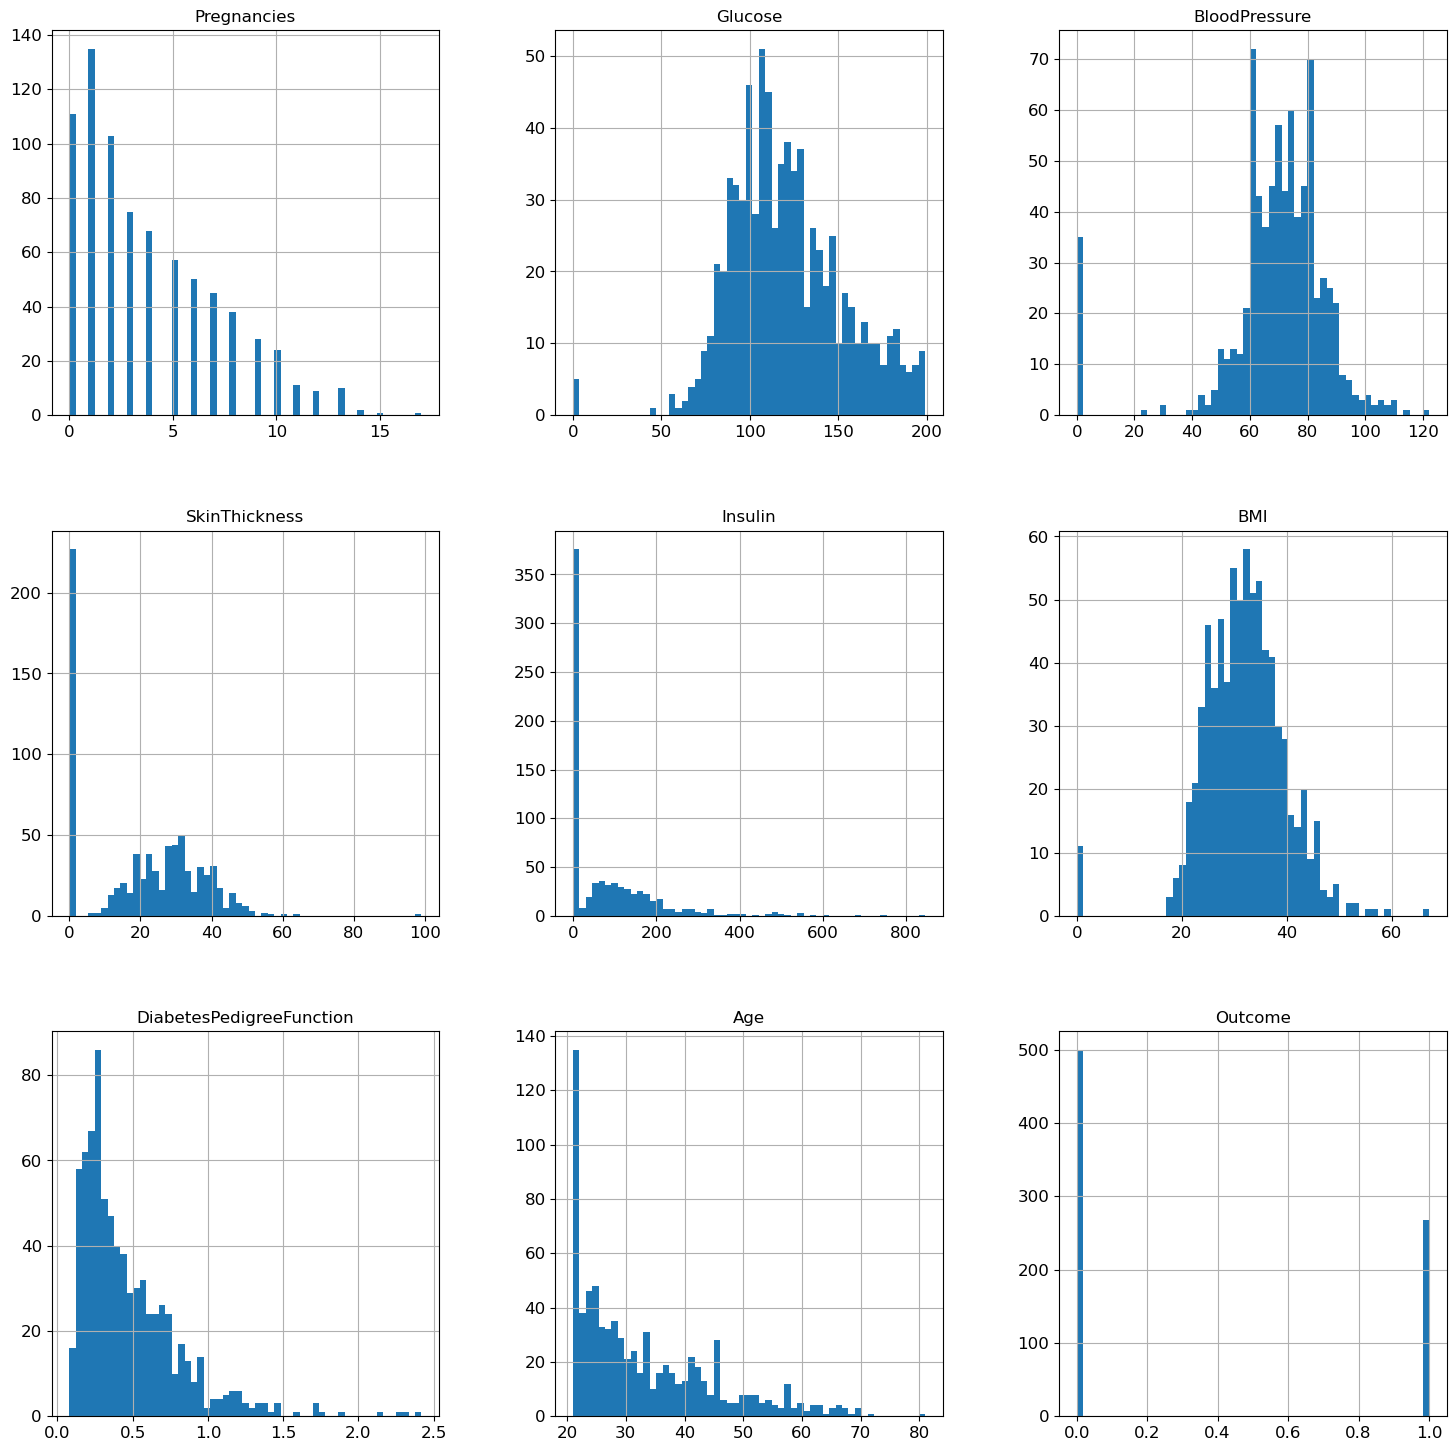

In [7]:
data.hist(bins=55, figsize= (18,18))
plt.show

In [8]:
from scipy import stats

z_scores = np.abs(stats.zscore(data))
outliers = np.where(z_scores > 2)


In [9]:
# Get the row indices of potential outliers
outlier_row_indices = outliers[0]

# Get the corresponding data points (rows) in your dataset
outlier_data_points = data.iloc[outlier_row_indices]

# Print or examine the outlier data points
print(outlier_data_points)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
4              0      137             40             35      168  43.1   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
..           ...      ...            ...            ...      ...   ...   
750            4      136             70              0        0  31.2   
753            0      181             88             44      510  43.3   
759            6      190             92              0        0  35.5   
759            6      190             92              0        0  35.5   
763           10      101             76             48      180  32.9   

     DiabetesPedigreeFunction  Age  Outcome  
4                       2.288   33        1  
7                  

In [10]:
import pandas as pd
# Replace 0s with NaN in the columns that likely have missing values
columns_with_missing = ["BloodPressure", "SkinThickness", "Insulin"]
data[columns_with_missing] = data[columns_with_missing].replace(0, float("NaN"))

# Impute missing values with the mean of their respective columns
data.fillna(data.mean(), inplace=True)

# Verify that missing values are imputed
data.isnull().sum()



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

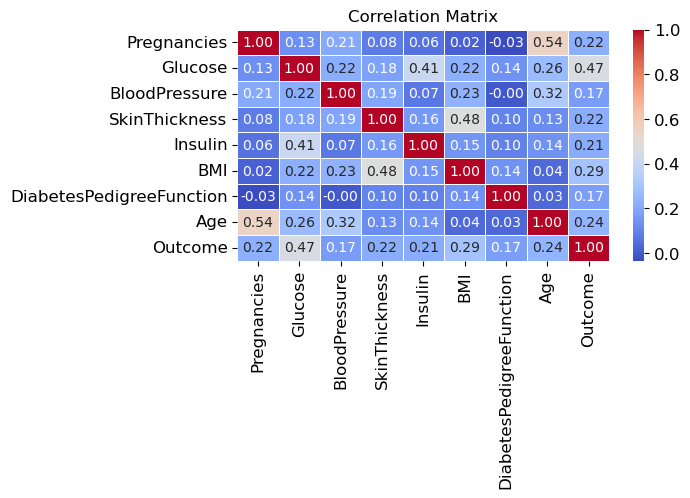

In [11]:
# Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(6,3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [12]:
# Prepare data for modeling
X = data.drop('Outcome', axis=1)
y = data['Outcome']

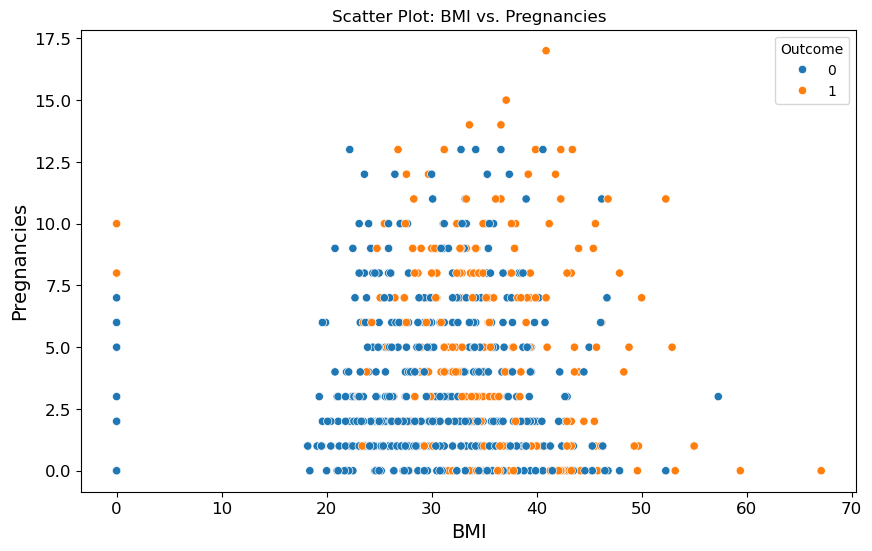

In [13]:
# Scatter plot: BMI vs. Pregnancies
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='Pregnancies', hue='Outcome', data=data)
plt.title('Scatter Plot: BMI vs. Pregnancies')
plt.xlabel('BMI')
plt.ylabel('Pregnancies')
plt.show()

# Splitting data into testing and training with 80% and 20% respectively

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Standardize features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Function to evaluate a model and print metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}\n")


In [174]:
# Logistic Regression Model
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X_train, y_train)
logistic_regression_pred = logistic_regression_model.predict(X_test)
evaluate_model(y_test, logistic_regression_pred, "Logistic Regression")

Metrics for Logistic Regression:
Accuracy: 0.75
Precision: 0.65
Recall: 0.64
F1 Score: 0.64



In [18]:
# Decision Tree Model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_pred = decision_tree_model.predict(X_test)
evaluate_model(y_test, decision_tree_pred, "Decision Tree")

Metrics for Decision Tree:
Accuracy: 0.74
Precision: 0.65
Recall: 0.60
F1 Score: 0.62



In [19]:
# K-Nearest Neighbors Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
evaluate_model(y_test, knn_pred, "K-Nearest Neighbors")

Metrics for K-Nearest Neighbors:
Accuracy: 0.76
Precision: 0.65
Recall: 0.71
F1 Score: 0.68



In [20]:
models = {
    "Logistic Regression": logistic_regression_model,
    "Decision Tree": decision_tree_model,
    "K-Nearest Neighbors": knn_model,
}
# Compare model accuracies
model_names = ["Logistic Regression", "Decision Tree", "K-Nearest Neighbors"]
accuracy_scores = []

for model_name in model_names:
    model = models[model_name]
    accuracy = cross_val_score(model, X_train, y_train, cv=5).mean()
    accuracy_scores.append(accuracy)

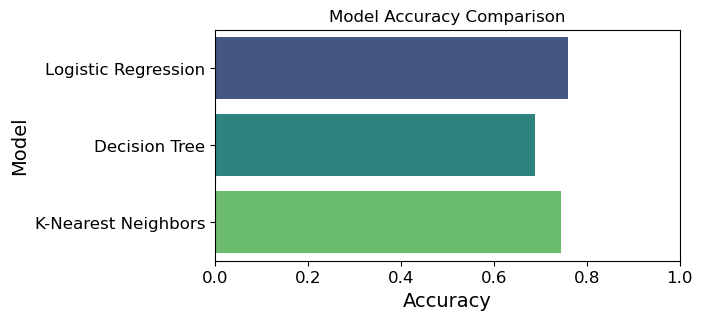

In [21]:
# Create a bar plot to visualize model accuracy
plt.figure(figsize=(6,3))
sns.barplot(x=accuracy_scores, y=model_names, palette='viridis')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)
plt.show()

In [22]:
# Correlation between BMI, Pregnancy, and Outcome
correlation_matrix = data[['BMI', 'Pregnancies', 'Outcome']].corr()
print(correlation_matrix)

                  BMI  Pregnancies   Outcome
BMI          1.000000     0.017683  0.292695
Pregnancies  0.017683     1.000000  0.221898
Outcome      0.292695     0.221898  1.000000


In [23]:
summary_by_diabetes = data.groupby('Outcome')[['BMI', 'Pregnancies']].describe()
print(summary_by_diabetes)

           BMI                                                       \
         count       mean       std  min   25%    50%     75%   max   
Outcome                                                               
0        500.0  30.304200  7.689855  0.0  25.4  30.05  35.300  57.3   
1        268.0  35.142537  7.262967  0.0  30.8  34.25  38.775  67.1   

        Pregnancies                                                 
              count      mean       std  min   25%  50%  75%   max  
Outcome                                                             
0             500.0  3.298000  3.017185  0.0  1.00  2.0  5.0  13.0  
1             268.0  4.865672  3.741239  0.0  1.75  4.0  8.0  17.0  


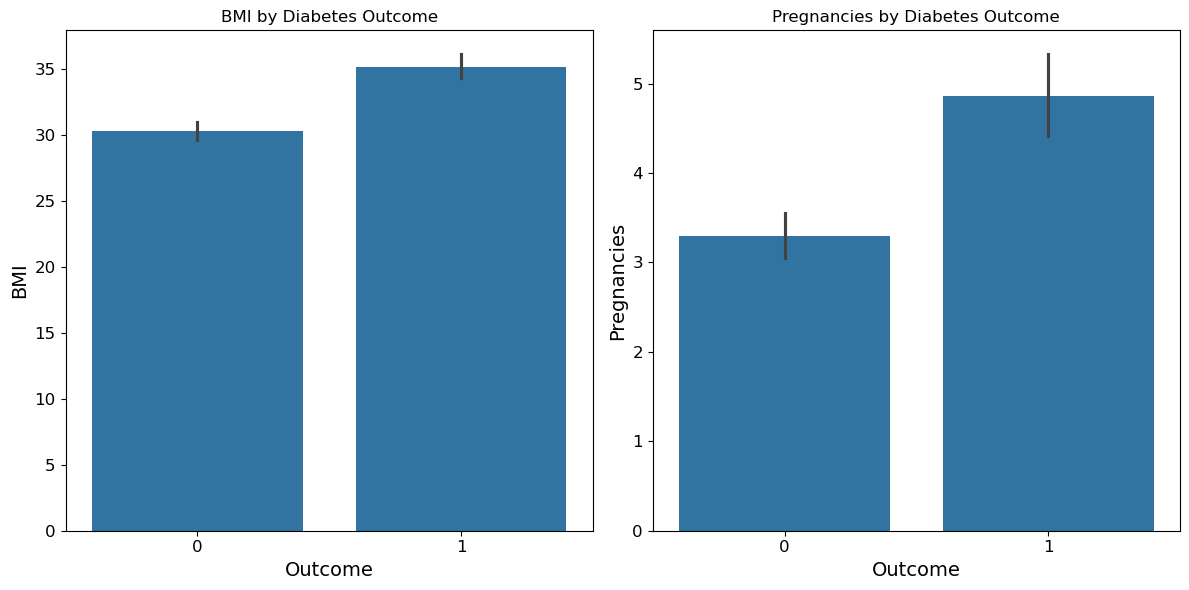

In [24]:
# Box plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Outcome', y='BMI', data=data)
plt.title('BMI by Diabetes Outcome')
plt.xlabel('Outcome')
plt.ylabel('BMI')

plt.subplot(1, 2, 2)
sns.barplot(x='Outcome', y='Pregnancies', data=data)
plt.title('Pregnancies by Diabetes Outcome')
plt.xlabel('Outcome')
plt.ylabel('Pregnancies')

plt.tight_layout()
plt.show()

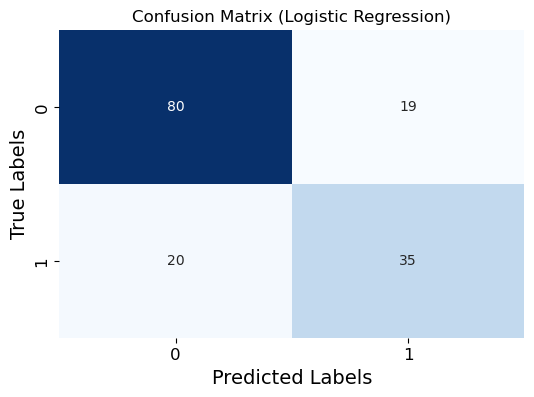

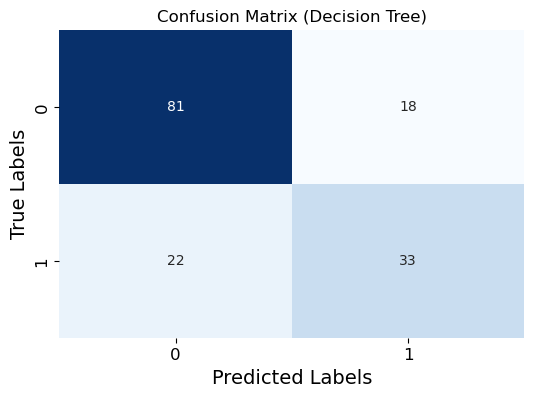

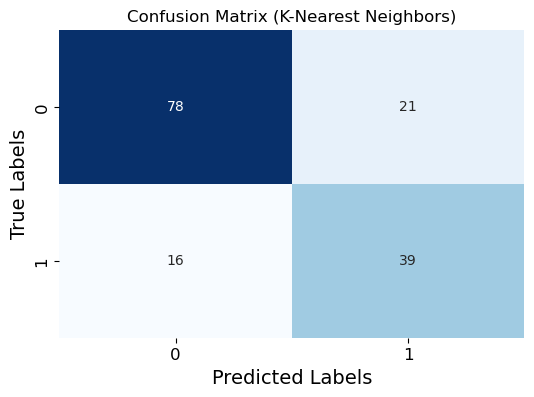

In [25]:
# Confusion matrices
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix ({model_name})')
    plt.show()
    
plot_confusion_matrix(y_test, logistic_regression_pred, "Logistic Regression")
plot_confusion_matrix(y_test, decision_tree_pred, "Decision Tree")
plot_confusion_matrix(y_test, knn_pred, "K-Nearest Neighbors")

In [26]:
# Model Selection: Select the best-performing model
best_model = None
best_accuracy = 0.0
models = {
    "Logistic Regression": logistic_regression_model,
    "Decision Tree": decision_tree_model,
    "K-Nearest Neighbors": knn_model,
}

for model_name, model in models.items():
    accuracy = cross_val_score(model, X_train, y_train, cv=5).mean()
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model_name

print("Best Model:", best_model)
print("Best Model Accuracy:", best_accuracy)


Best Model: Logistic Regression
Best Model Accuracy: 0.7606290817006531


In [ ]:
# Using AUC-ROC Metric for seeing better results in accuracy among used Models

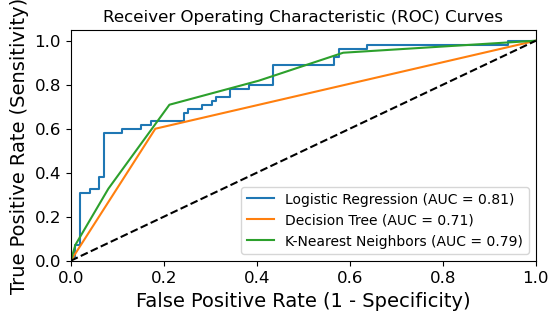

In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have already trained your models (logistic_regression_model, decision_tree_model, knn_model)

plt.figure(figsize=(6,3))

# Logistic Regression ROC Curve
logistic_regression_probs = logistic_regression_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, logistic_regression_probs)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

# Decision Tree ROC Curve
decision_tree_probs = decision_tree_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, decision_tree_probs)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

# K-Nearest Neighbors ROC Curve
knn_probs = knn_model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neighbors (AUC = {roc_auc_knn:.2f})')


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


# Trying the new models (SVM, Random Forest)

In [ ]:
# SVM

In [162]:
from sklearn.svm import SVC

# Ensure that probability=True is set when initializing the SVC model
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
# Now you can use predict_proba
svm_probs = svm_model.predict_proba(X_test)[:, 1]

In [150]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
evaluate_model(y_test, svm_pred, "Support Vector Machine")

Metrics for Support Vector Machine:
Accuracy: 0.75
Precision: 0.67
Recall: 0.62
F1 Score: 0.64



In [ ]:
# Random Forest Classifier

In [152]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
evaluate_model(y_test, rf_pred, "Random Forest")

Metrics for Random Forest:
Accuracy: 0.73
Precision: 0.62
Recall: 0.67
F1 Score: 0.64



In [ ]:
# Measuring Accuracy For All The models

In [176]:
models = {
    "Logistic Regression": logistic_regression_model,
    "Decision Tree": decision_tree_model,
    "K-Nearest Neighbors": knn_model,
    "Support Vector Machine": svm_model,
    "Random Forest Classifier": rf_model,
}
# Compare model accuracies
model_names = ["Logistic Regression", "Decision Tree", "K-Nearest Neighbors", "Support Vector Machine", "Random Forest Classifier"]
accuracy_scores = []

for model_name in model_names:
    model = models[model_name]
    accuracy = cross_val_score(model, X_train, y_train, cv=5).mean()
    accuracy_scores.append(accuracy)

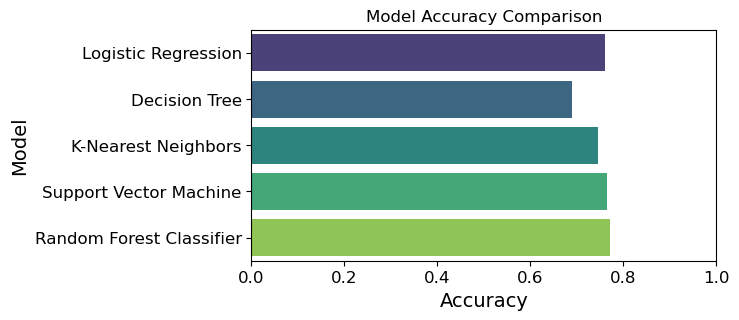

In [172]:
# Create a bar plot to visualize model accuracy
plt.figure(figsize=(6,3))
sns.barplot(x=accuracy_scores, y=model_names, palette='viridis')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)
plt.show()

In [ ]:
# Confusion Matrices for all models

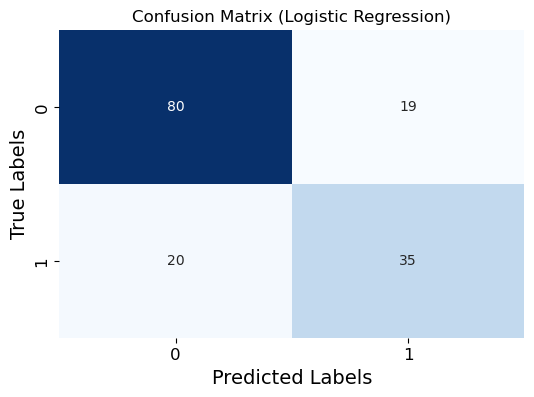

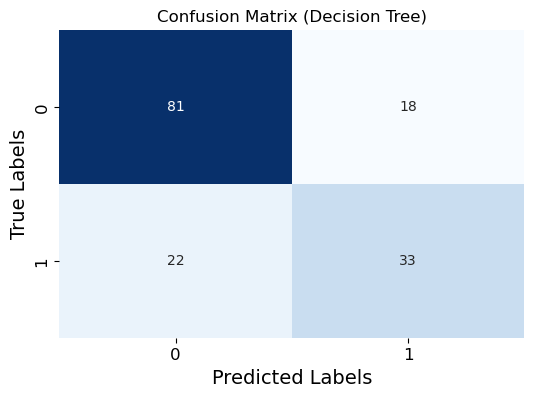

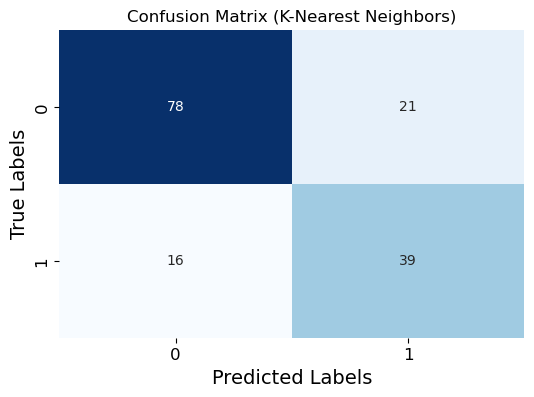

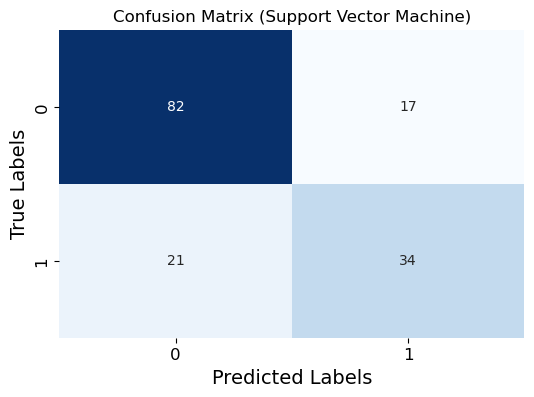

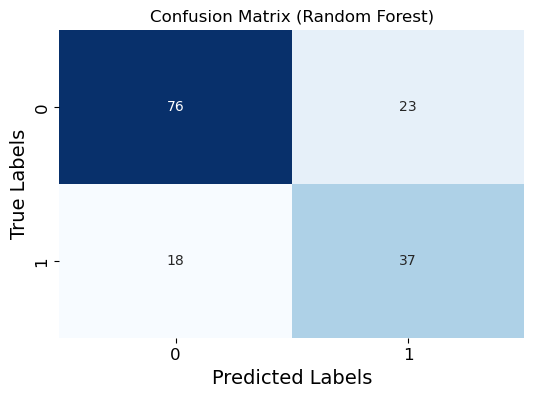

In [186]:
# Confusion matrices
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix ({model_name})')
    plt.show()
    
plot_confusion_matrix(y_test, logistic_regression_pred, "Logistic Regression")
plot_confusion_matrix(y_test, decision_tree_pred, "Decision Tree")
plot_confusion_matrix(y_test, knn_pred, "K-Nearest Neighbors")
plot_confusion_matrix(y_test, svm_pred, "Support Vector Machine")
plot_confusion_matrix(y_test, rf_pred, "Random Forest")

In [ ]:
# Displaying better Accuracy among all models by Cross validation

In [180]:
# Model Selection: Select the best-performing model
best_model = None
best_accuracy = 0.0
models = {
    "Logistic Regression": logistic_regression_model,
    "Decision Tree": decision_tree_model,
    "K-Nearest Neighbors": knn_model,
    "Support Vector Machine": svm_model,
    "Random Forest Classifier": rf_model,
}

for model_name, model in models.items():
    accuracy = cross_val_score(model, X_train, y_train, cv=5).mean()
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model_name

print("Best Model:", best_model)
print("Best Model Accuracy:", best_accuracy)


Best Model: Random Forest Classifier
Best Model Accuracy: 0.7703985072637611


In [ ]:
# Displaying AUC-ROC metric among All Models.

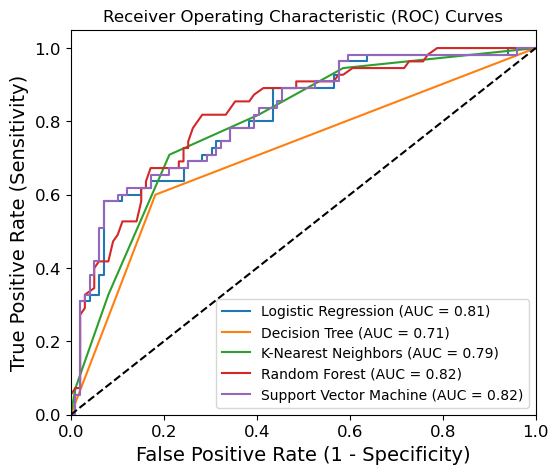

In [164]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have already trained your models (logistic_regression_model, decision_tree_model, knn_model, random forest, support vector machine)

plt.figure(figsize=(6,5))

# Logistic Regression ROC Curve
logistic_regression_probs = logistic_regression_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, logistic_regression_probs)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

# Decision Tree ROC Curve
decision_tree_probs = decision_tree_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, decision_tree_probs)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

# K-Nearest Neighbors ROC Curve
knn_probs = knn_model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neighbors (AUC = {roc_auc_knn:.2f})')

# Random Forest ROC Curve
rf_probs = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Support Vector Machine ROC Curve
svm_probs = svm_model.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, threshold_svm = roc_curve(y_test, svm_probs)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, label=f'Support Vector Machine (AUC = {roc_auc_svm:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


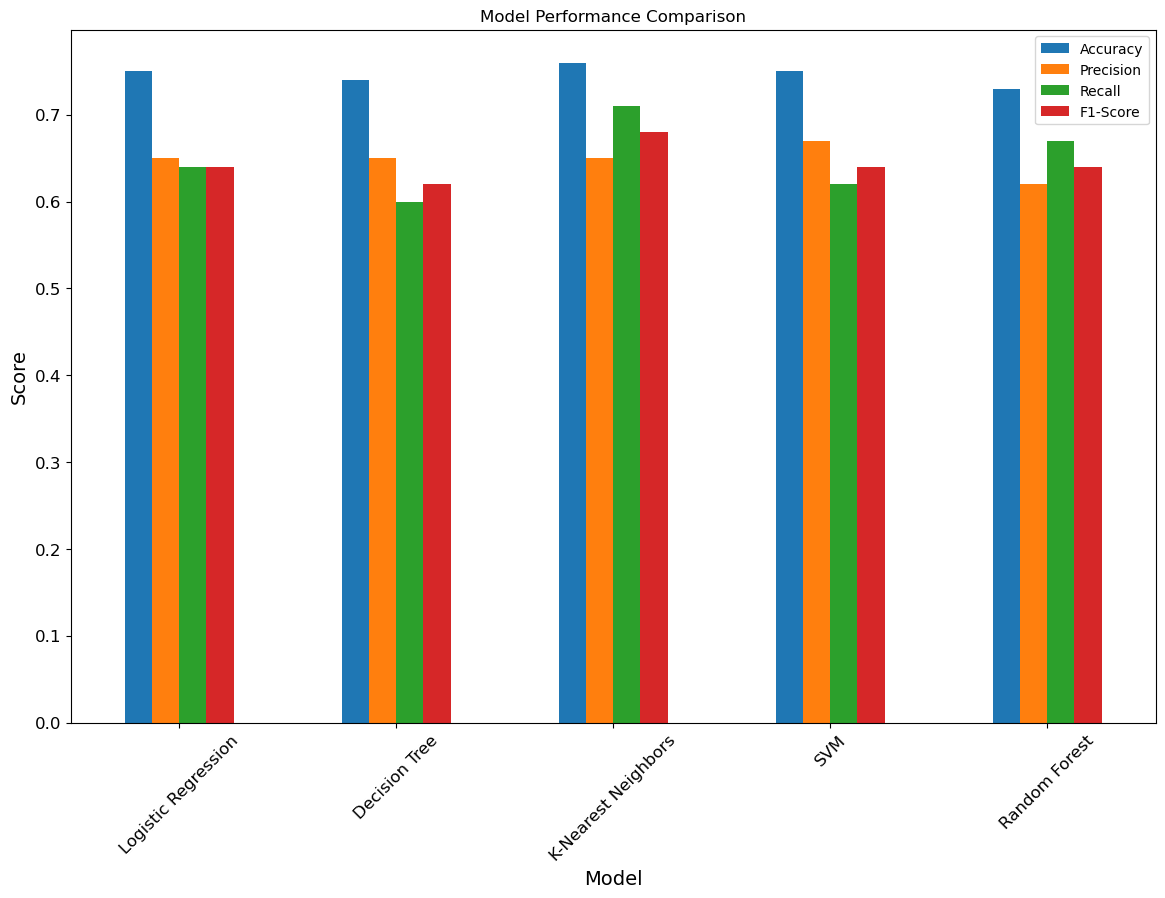

In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors', 'SVM', 'Random Forest'],
    'Accuracy': [0.75, 0.74, 0.76, 0.75, 0.73],
    'Precision': [0.65, 0.65, 0.65, 0.67, 0.62],
    'Recall': [0.64, 0.60, 0.71, 0.62, 0.67],
    'F1-Score': [0.64, 0.62, 0.68, 0.64, 0.64]
}

df = pd.DataFrame(data)
df.set_index('Model', inplace=True)

# Plot
df.plot(kind='bar', figsize=(14, 9))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()


# Trying with Splitting the training and testing with 75% and 25% respectively

In [188]:
# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [190]:
# Standardize features using StandardScaler
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)


In [192]:
def evaluate_model(y1_true, y1_pred, model_name):
    accuracy = accuracy_score(y1_true, y1_pred)
    precision = precision_score(y1_true, y1_pred)
    recall = recall_score(y1_true, y1_pred)
    f1 = f1_score(y1_true, y1_pred)
    
    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}\n")


In [194]:
# Logistic Regression Model
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X1_train, y1_train)
logistic_regression_pred = logistic_regression_model.predict(X1_test)
evaluate_model(y1_test, logistic_regression_pred, "Logistic Regression")


Metrics for Logistic Regression:
Accuracy: 0.72
Precision: 0.61
Recall: 0.59
F1 Score: 0.60



In [196]:
# Decision Tree Model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X1_train, y1_train)
decision_tree_pred = decision_tree_model.predict(X1_test)
evaluate_model(y1_test, decision_tree_pred, "Decision Tree")

Metrics for Decision Tree:
Accuracy: 0.66
Precision: 0.52
Recall: 0.70
F1 Score: 0.59



In [198]:
# K-Nearest Neighbors Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X1_train, y1_train)
knn_pred = knn_model.predict(X1_test)
evaluate_model(y1_test, knn_pred, "K-Nearest Neighbors")


Metrics for K-Nearest Neighbors:
Accuracy: 0.73
Precision: 0.61
Recall: 0.68
F1 Score: 0.64



In [220]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X1_train, y1_train)
svm_pred = svm_model.predict(X1_test)
evaluate_model(y1_test, svm_pred, "Support Vector Machine")


Metrics for Support Vector Machine:
Accuracy: 0.73
Precision: 0.63
Recall: 0.59
F1 Score: 0.61



In [204]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X1_train, y1_train)
rf_pred = rf_model.predict(X1_test)
evaluate_model(y1_test, rf_pred, "Random Forest")


Metrics for Random Forest:
Accuracy: 0.74
Precision: 0.63
Recall: 0.67
F1 Score: 0.65



In [206]:
models = {
    "Logistic Regression": logistic_regression_model,
    "Decision Tree": decision_tree_model,
    "K-Nearest Neighbors": knn_model,
    "Support Vector Machine": svm_model,
    "Random Forest Classifier": rf_model,
}
# Compare model accuracies
model_names = ["Logistic Regression", "Decision Tree", "K-Nearest Neighbors", "Support Vector Machine", "Random Forest Classifier"]
accuracy_scores = []

for model_name in model_names:
    model = models[model_name]
    accuracy = cross_val_score(model, X1_train, y1_train, cv=5).mean()
    accuracy_scores.append(accuracy)


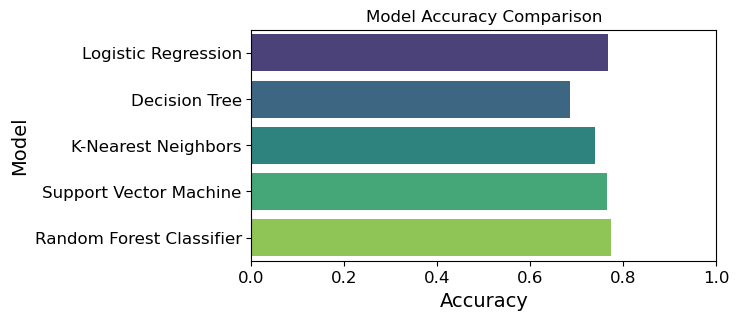

In [208]:
plt.figure(figsize=(6,3))
sns.barplot(x=accuracy_scores, y=model_names, palette='viridis')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)
plt.show()


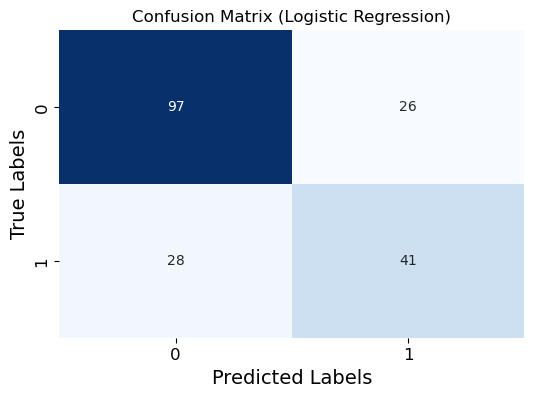

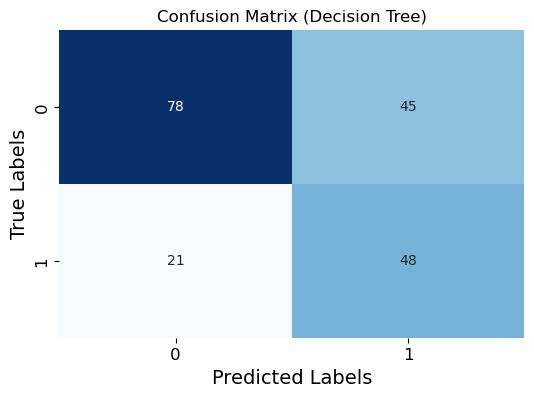

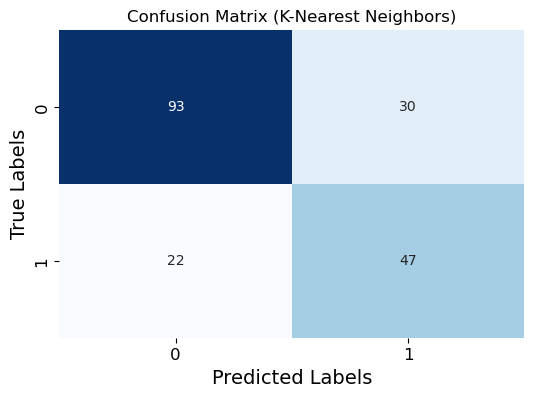

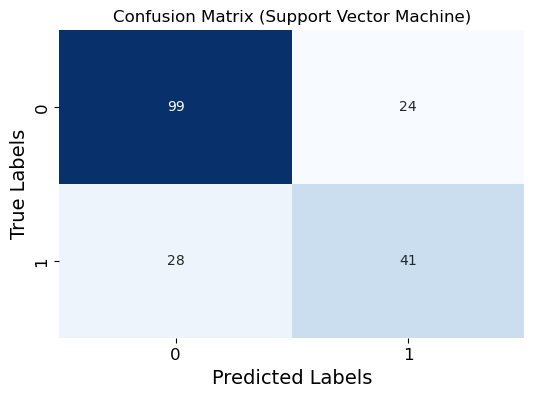

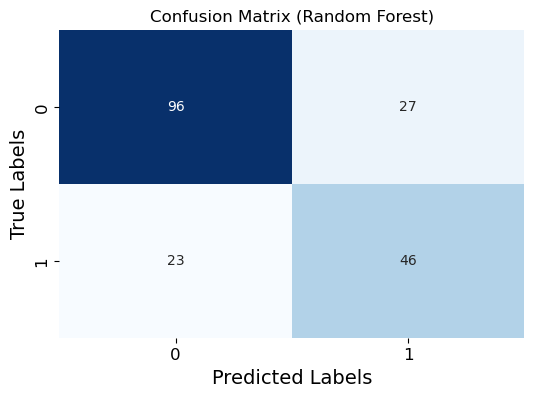

In [222]:
# Confusion matrices
def plot_confusion_matrix(y1_true, y1_pred, model_name):
    cm = confusion_matrix(y1_true, y1_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix ({model_name})')
    plt.show()
    
plot_confusion_matrix(y1_test, logistic_regression_pred, "Logistic Regression")
plot_confusion_matrix(y1_test, decision_tree_pred, "Decision Tree")
plot_confusion_matrix(y1_test, knn_pred, "K-Nearest Neighbors")
plot_confusion_matrix(y1_test, svm_pred, "Support Vector Machine")
plot_confusion_matrix(y1_test, rf_pred, "Random Forest")

In [210]:
# Model Selection: Select the best-performing model
best_model = None
best_accuracy = 0.0
models = {
    "Logistic Regression": logistic_regression_model,
    "Decision Tree": decision_tree_model,
    "K-Nearest Neighbors": knn_model,
    "Support Vector Machine": svm_model,
    "Random Forest Classifier": rf_model,
}

for model_name, model in models.items():
    accuracy = cross_val_score(model, X1_train, y1_train, cv=5).mean()
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model_name

print("Best Model:", best_model)
print("Best Model Accuracy:", best_accuracy)


Best Model: Random Forest Classifier
Best Model Accuracy: 0.7743178410794602


In [216]:
# Ensure that probability=True is set when initializing the SVC model
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X1_train, y1_train)
# Now you can use predict_proba
svm_probs = svm_model.predict_proba(X1_test)[:, 1]

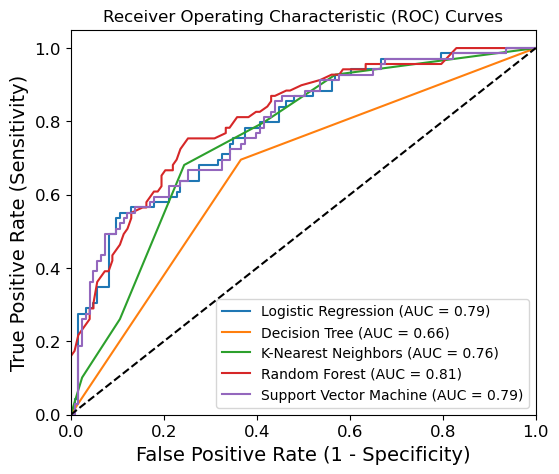

In [218]:
# Assuming you have already trained your models (logistic_regression_model, decision_tree_model, knn_model, random forest, support vector machine)

plt.figure(figsize=(6,5))

# Logistic Regression ROC Curve
logistic_regression_probs = logistic_regression_model.predict_proba(X1_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y1_test, logistic_regression_probs)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

# Decision Tree ROC Curve
decision_tree_probs = decision_tree_model.predict_proba(X1_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y1_test, decision_tree_probs)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

# K-Nearest Neighbors ROC Curve
knn_probs = knn_model.predict_proba(X1_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y1_test, knn_probs)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neighbors (AUC = {roc_auc_knn:.2f})')

# Random Forest ROC Curve
rf_probs = rf_model.predict_proba(X1_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y1_test, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Support Vector Machine ROC Curve
svm_probs = svm_model.predict_proba(X1_test)[:, 1]
fpr_svm, tpr_svm, threshold_svm = roc_curve(y1_test, svm_probs)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, label=f'Support Vector Machine (AUC = {roc_auc_svm:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()



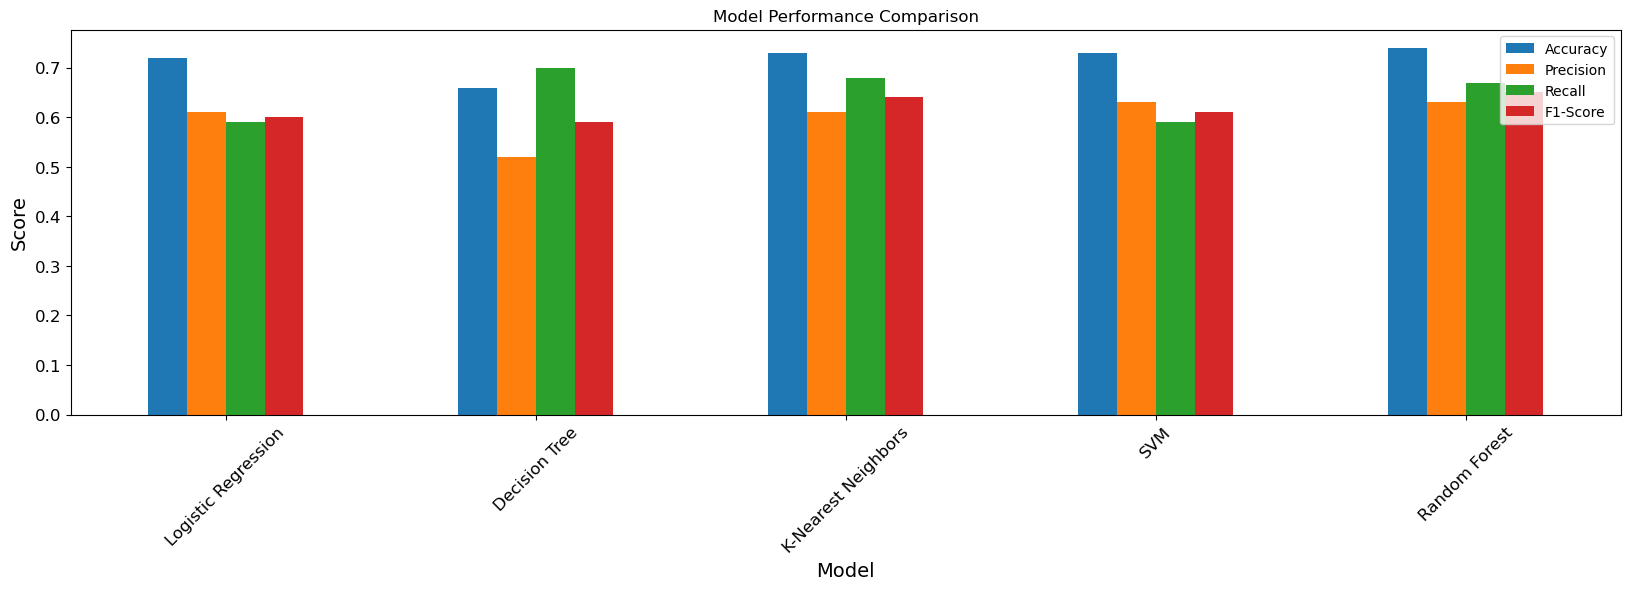

In [290]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors', 'SVM', 'Random Forest'],
    'Accuracy': [0.72, 0.66, 0.73, 0.73, 0.74],
    'Precision': [0.61, 0.52, 0.61, 0.63, 0.63],
    'Recall': [0.59, 0.70, 0.68, 0.59, 0.67],
    'F1-Score': [0.60, 0.59, 0.64, 0.61, 0.65]
}

df = pd.DataFrame(data)
df.set_index('Model', inplace=True)

# Plot
df.plot(kind='bar', figsize=(20, 5))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()
